<a href="https://colab.research.google.com/github/montblanc-1981/data-analysis-basic-kadai/blob/main/deeplearning/keras05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from tensorflow.keras import utils

In [50]:
utils.set_random_seed(0)


In [51]:
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [52]:
(x_train, y_train), (x_test, y_test) = data

In [53]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [54]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


In [56]:
#np.set_printoptions(linewidth=300)
#x_train[2]

array([9], dtype=uint8)

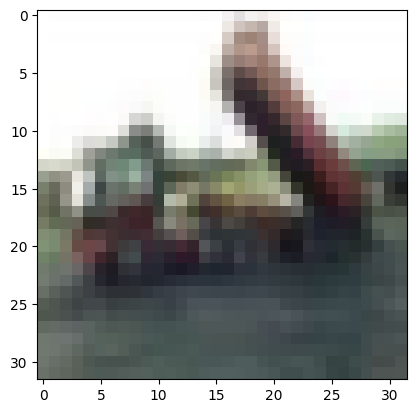

In [57]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap='gray')
y_train[2]



In [58]:
x_train = x_train / 255
x_test = x_test / 255

In [59]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [60]:
y_train[2]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [89]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy')

In [91]:
history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.8923 - accuracy: 0.3263 - val_loss: 1.7491 - val_accuracy: 0.3742
Epoch 2/10
1407/1407 [==============================] - 31s 22ms/step - loss: 1.7060 - accuracy: 0.3925 - val_loss: 1.7283 - val_accuracy: 0.3788
Epoch 3/10
1407/1407 [==============================] - 31s 22ms/step - loss: 1.6451 - accuracy: 0.4156 - val_loss: 1.6444 - val_accuracy: 0.4176
Epoch 4/10
1407/1407 [==============================] - 32s 23ms/step - loss: 1.6005 - accuracy: 0.4279 - val_loss: 1.6276 - val_accuracy: 0.4238
Epoch 5/10
1407/1407 [==============================] - 32s 22ms/step - loss: 1.5655 - accuracy: 0.4446 - val_loss: 1.5701 - val_accuracy: 0.4398
Epoch 6/10
1407/1407 [==============================] - 31s 22ms/step - loss: 1.5389 - accuracy: 0.4510 - val_loss: 1.5586 - val_accuracy: 0.4506
Epoch 7/10
1407/1407 [==============================] - 32s 23ms/step - loss: 1.5196 - accuracy: 0.4619 - val_loss: 1.5546 -

In [92]:
history.history

{'loss': [1.892264723777771,
  1.7059545516967773,
  1.6451224088668823,
  1.6004619598388672,
  1.5655081272125244,
  1.538878083229065,
  1.5196499824523926,
  1.4986844062805176,
  1.4841359853744507,
  1.4699627161026],
 'accuracy': [0.32626667618751526,
  0.3925333321094513,
  0.41555556654930115,
  0.42791110277175903,
  0.44457778334617615,
  0.4510444402694702,
  0.4618888795375824,
  0.46862220764160156,
  0.47137778997421265,
  0.4766888916492462],
 'val_loss': [1.7490525245666504,
  1.7283415794372559,
  1.6444404125213623,
  1.6276215314865112,
  1.5701383352279663,
  1.5586079359054565,
  1.554555892944336,
  1.5422308444976807,
  1.5438072681427002,
  1.5317738056182861],
 'val_accuracy': [0.3741999864578247,
  0.37880000472068787,
  0.41760000586509705,
  0.423799991607666,
  0.4397999942302704,
  0.4505999982357025,
  0.4368000030517578,
  0.4535999894142151,
  0.45239999890327454,
  0.4602000117301941]}

In [93]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.892265,0.326267,1.749053,0.3742
1,1.705955,0.392533,1.728342,0.3788
2,1.645122,0.415556,1.644440,0.4176
3,1.600462,0.427911,1.627622,0.4238
4,1.565508,0.444578,1.570138,0.4398
5,1.538878,0.451044,1.558608,0.4506
6,1.519650,0.461889,1.554556,0.4368
7,1.498684,0.468622,1.542231,0.4536
8,1.484136,0.471378,1.543807,0.4524
9,1.469963,0.476689,1.531774,0.4602


<Axes: >

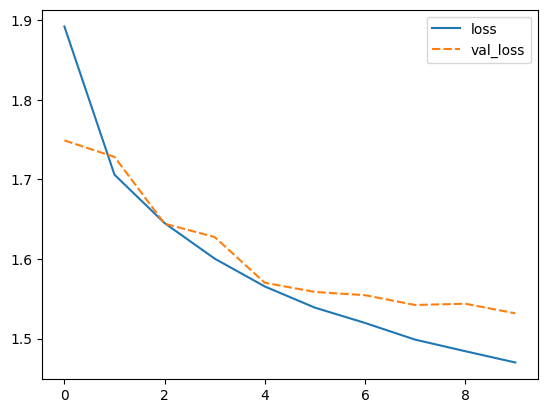

In [94]:
import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])


<Axes: >

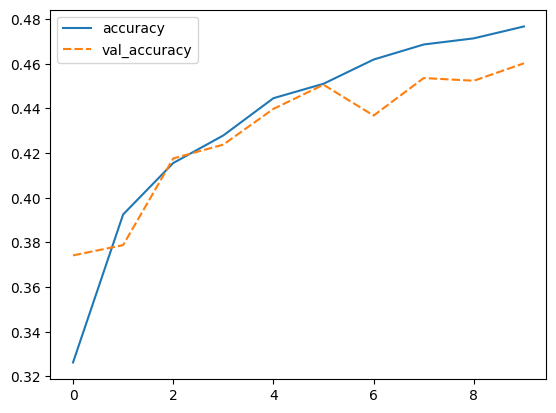

In [95]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])


In [ ]:
utils.set_random_seed(0)

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy')

history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

In [88]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.9361 - accuracy: 0.2440


[1.9360737800598145, 0.24400000274181366]